In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

with open('pga.pickle', 'rb') as file:
    g = pickle.load(file)
g.head()

,money,name,height_inches,weight_lbs,birthyear,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
0,25271,Robert Allenby,73.0,180,1971,51.0,55.06,2016,282.2,63.73,30.41,50.75,73.117,9,0.0,-0.491,-1.950,-0.631,-0.460,-0.368
1,271887,Robert Allenby,73.0,180,1971,63.0,63.06,2015,282.7,66.67,30.03,51.69,72.102,169,1.0,-0.754,-0.970,-0.262,0.260,-0.213
2,514288,Robert Allenby,73.0,180,1971,83.0,61.47,2014,284.9,67.63,29.85,59.96,70.920,438,0.0,-0.163,0.105,-0.050,0.552,-0.234
3,204272,Robert Allenby,73.0,180,1971,58.0,57.87,2013,284.9,62.40,29.64,52.77,72.056,129,1.0,-0.337,-0.859,-0.733,0.296,-0.085
4,808927,Robert Allenby,73.0,180,1971,76.0,59.34,2012,286.7,65.79,29.91,50.85,71.355,417,2.0,-0.428,-0.626,-0.449,0.537,-0.286


In [2]:
g.columns

Index(['money', 'name', 'height_inches', 'weight_lbs', 'birthyear', 'Rounds',
       'Fairway Percentage', 'Year', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Top 10',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG'],
      dtype='object')

In [3]:
g_small = g.drop(['Average Score', 'Points', 'Top 10', 'Average SG Total', 'Year','name'], axis=1)

In [4]:
g_small.head()

,money,height_inches,weight_lbs,birthyear,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average SG Putts,SG:OTT,SG:APR,SG:ARG
0,25271,73.0,180,1971,51.0,55.06,282.2,63.73,30.41,50.75,-0.491,-0.631,-0.460,-0.368
1,271887,73.0,180,1971,63.0,63.06,282.7,66.67,30.03,51.69,-0.754,-0.262,0.260,-0.213
2,514288,73.0,180,1971,83.0,61.47,284.9,67.63,29.85,59.96,-0.163,-0.050,0.552,-0.234
3,204272,73.0,180,1971,58.0,57.87,284.9,62.40,29.64,52.77,-0.337,-0.733,0.296,-0.085
4,808927,73.0,180,1971,76.0,59.34,286.7,65.79,29.91,50.85,-0.428,-0.449,0.537,-0.286


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

***
**Try Log Transformation**

In [6]:
import math
g_small['logmoney'] = g_small['money'].apply(lambda x: math.log(x))

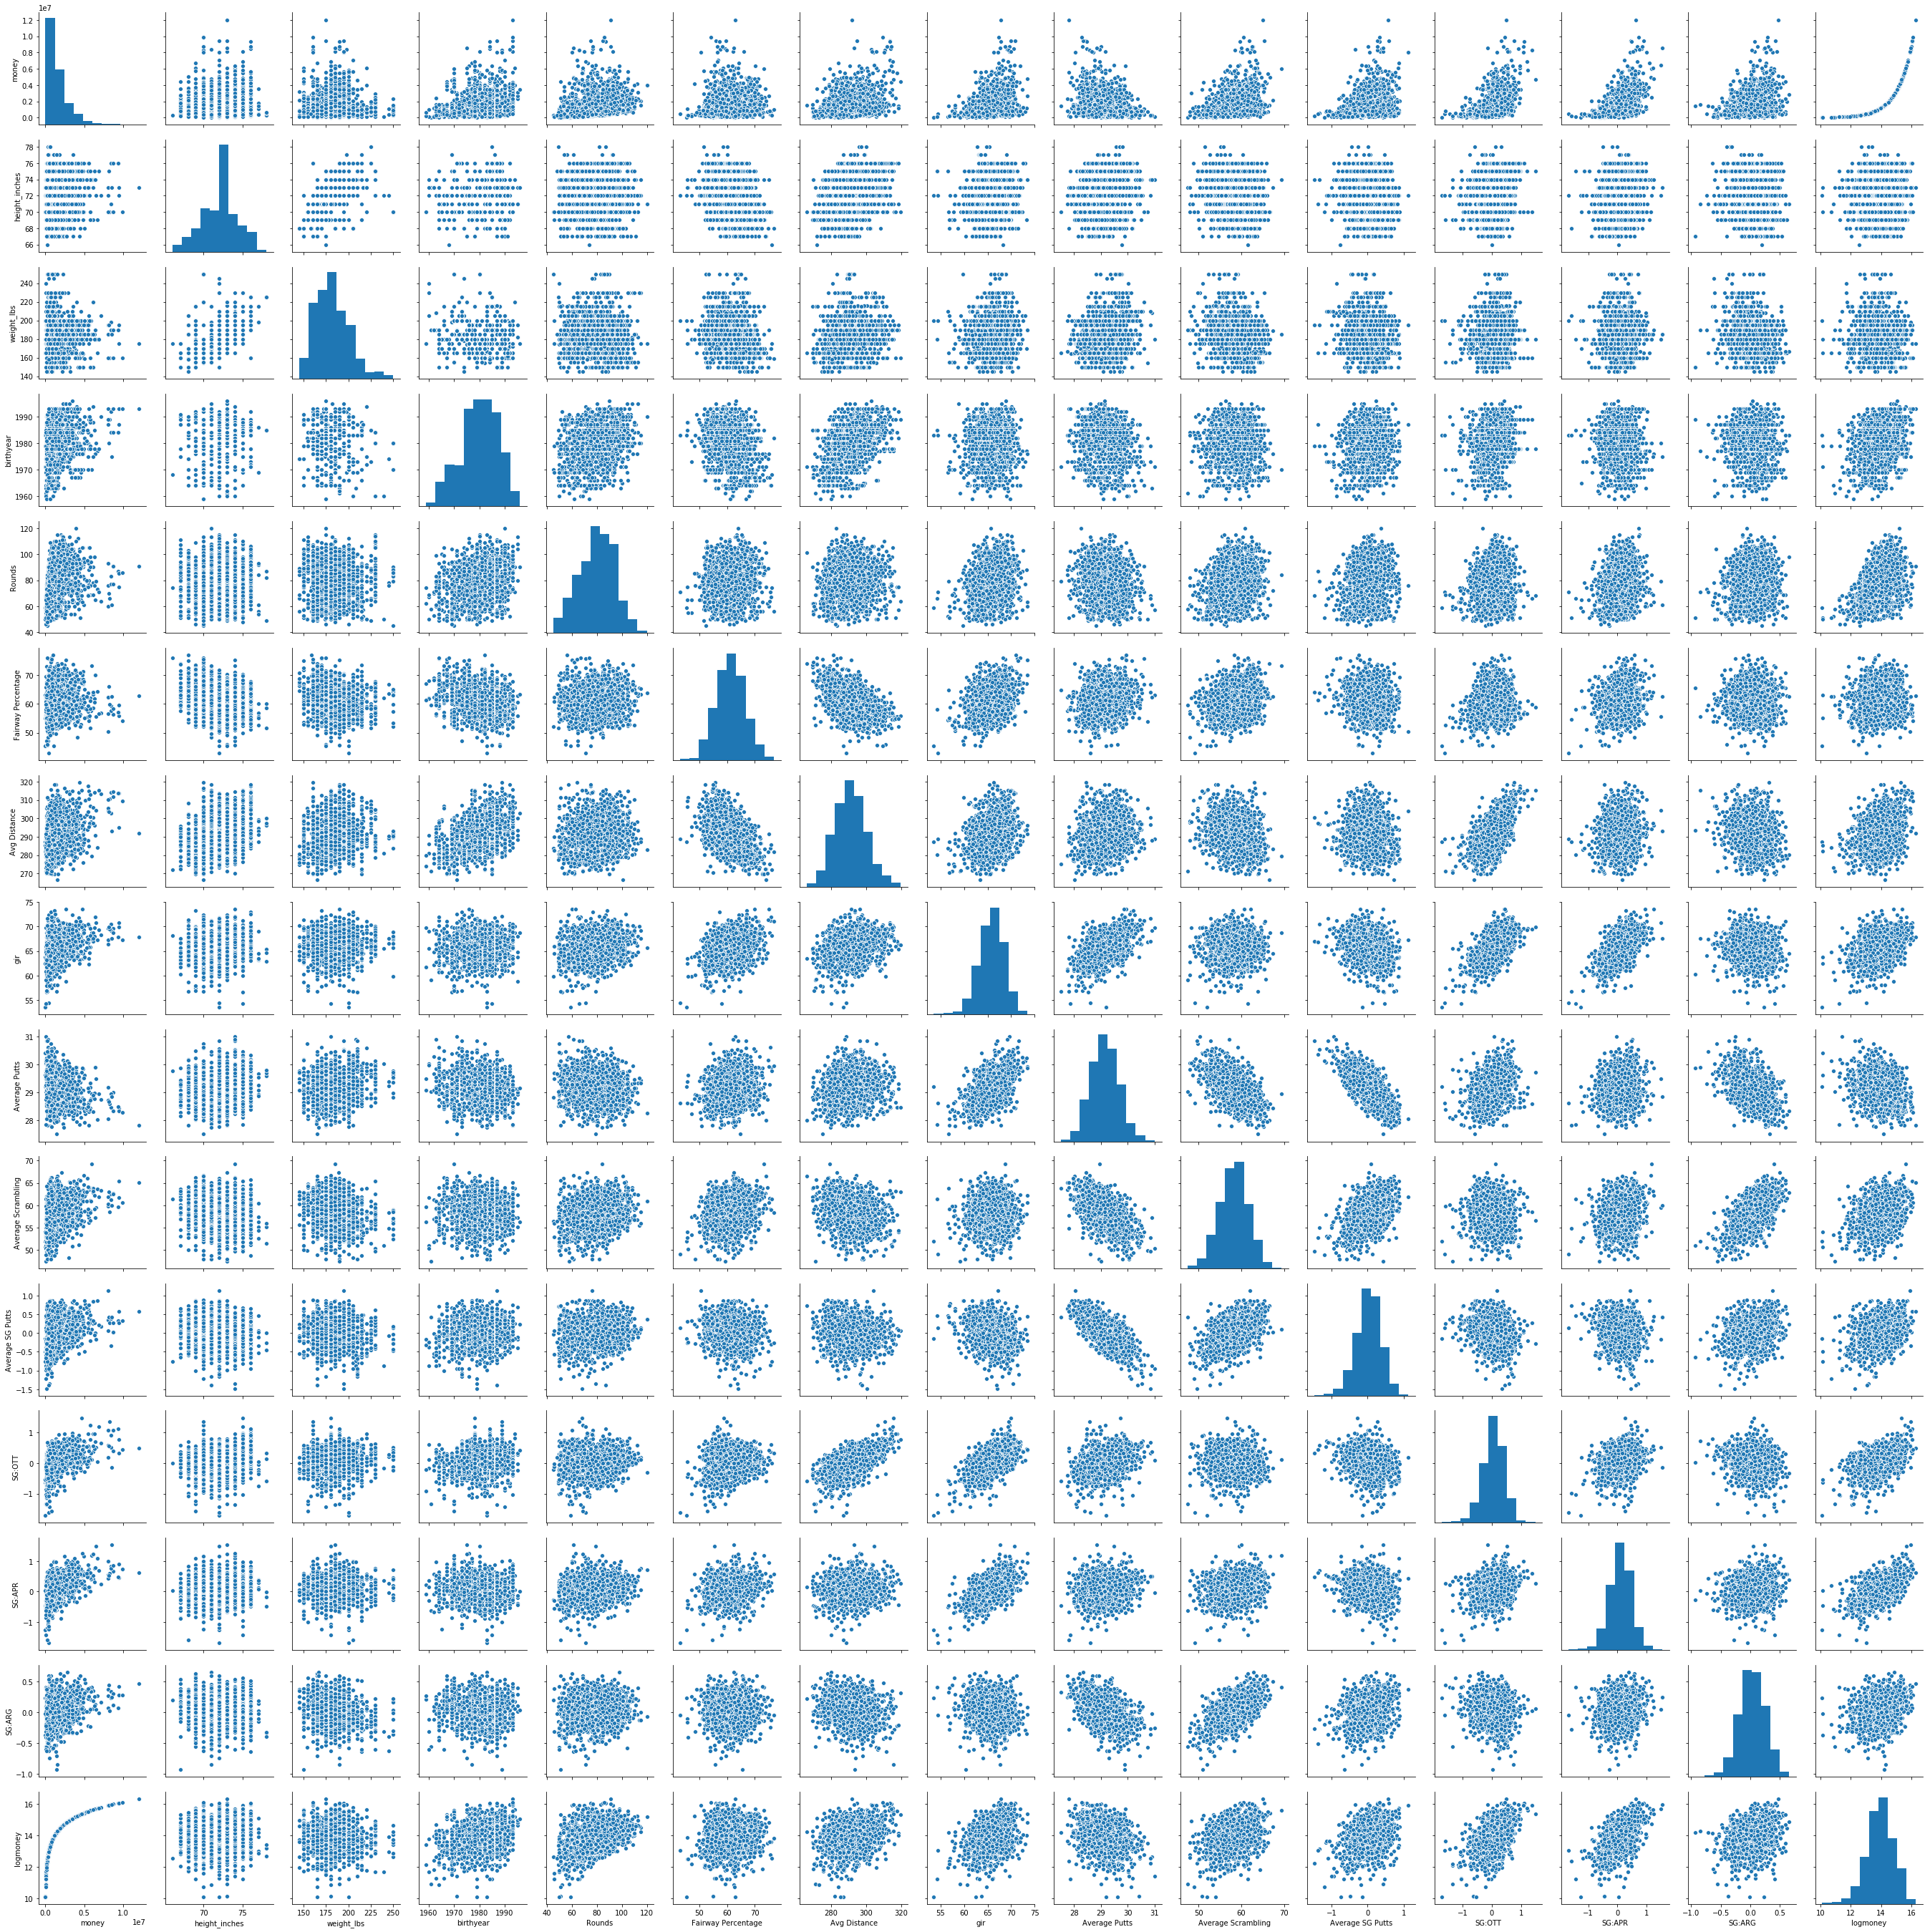

In [7]:
fig = sns.pairplot(g_small).set_syle=('dark')
#plt.savefig('logplot.png', transparent=False)
plt.show()
plt.close()

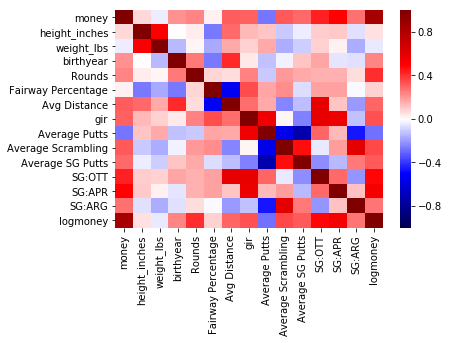

In [8]:
sns.heatmap(g_small.corr(), cmap='seismic', vmin=-1, vmax=1)
plt.show()
plt.close()

In [9]:
g_small.corr()

,money,height_inches,weight_lbs,birthyear,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average SG Putts,SG:OTT,SG:APR,SG:ARG,logmoney
money,1.000000,0.076239,-0.032494,0.213610,0.239102,0.027474,0.316777,0.306611,-0.266828,0.320547,0.290540,0.435384,0.496893,0.275590,0.851547
height_inches,0.076239,1.000000,0.520670,0.003740,0.037186,-0.261061,0.293811,0.132858,0.115985,-0.105004,-0.038458,0.097723,0.107365,-0.055415,0.056130
weight_lbs,-0.032494,0.520670,1.000000,-0.135173,0.016704,-0.164263,0.169250,0.089212,0.167638,-0.163442,-0.100936,0.091074,0.026570,-0.158495,-0.039576
birthyear,0.213610,0.003740,-0.135173,1.000000,0.261021,-0.258962,0.416436,0.041995,-0.118160,-0.026150,0.116352,0.178420,-0.051791,-0.060988,0.238317
Rounds,0.239102,0.037186,0.016704,0.261021,1.000000,0.081012,0.067720,0.244681,-0.105069,0.202199,0.168994,0.154982,0.152273,0.067228,0.412711
Fairway Percentage,0.027474,-0.261061,-0.164263,-0.258962,0.081012,1.000000,-0.533872,0.349011,0.172919,0.225022,-0.067856,0.186847,0.183440,-0.008626,0.086300
Avg Distance,0.316777,0.293811,0.169250,0.416436,0.067720,-0.533872,1.000000,0.288542,0.166852,-0.238945,-0.126823,0.599848,0.109661,-0.198124,0.304358
gir,0.306611,0.132858,0.089212,0.041995,0.244681,0.349011,0.288542,1.000000,0.559709,0.019674,-0.249136,0.587987,0.572204,-0.123666,0.342803
Average Putts,-0.266828,0.115985,0.167638,-0.118160,-0.105069,0.172919,0.166852,0.559709,1.000000,-0.560378,-0.729906,0.304393,0.137161,-0.453284,-0.274065
Average Scrambling,0.320547,-0.105004,-0.163442,-0.026150,0.202199,0.225022,-0.238945,0.019674,-0.560378,1.000000,0.471112,-0.040989,0.190625,0.613033,0.356164


In [10]:
#Simple validation method: train/validation/test  60-20-20

X, y = g_small.drop(['logmoney','money'], axis=1), g_small['logmoney']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=100)

poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')


lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly,y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression train R^2: 0.757
Linear Regression val R^2: 0.739
Ridge Regression train R^2: 0.744
Ridge Regression val R^2: 0.726
Degree 2 polynomial regression train R^2: 0.799
Degree 2 polynomial regression val R^2: 0.711


In [11]:
lm.fit(X,y)
print(f'Linear Regression val R^2: {lm.score(X_test, y_test):.3f}')

lm_reg.fit(X,y)
print(f'Ridge Regression val R^2: {lm_reg.score(X_test, y_test):.3f}')

lm_poly.fit(X,y)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_test, y_test):.3f}')

Linear Regression val R^2: 0.711
Ridge Regression val R^2: 0.632
Degree 2 polynomial regression val R^2: 0.711


In [12]:
lm_poly.coef_

array([-5.97337072e-03,  1.43322276e-04,  6.09337911e-03,  1.43491733e-02,
        1.28890630e-02,  9.30190942e-03, -4.14463990e-02, -2.22667204e-01,
       -4.03025379e-02,  8.70394586e-01,  1.08503620e+00,  1.16666728e+00,
        1.07481728e+00])

***
**Tweak model with lasso and ridge**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


/home/rob/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
lasso_model = Lasso(alpha = .01)
lasso_model.fit(X_train, y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('height_inches', 0.0),
 ('weight_lbs', -0.00012173009388839208),
 ('birthyear', 0.006878718395191261),
 ('Rounds', 0.014056441892758776),
 ('Fairway Percentage', 0.01769499526701605),
 ('Avg Distance', 0.016300948118251744),
 ('gir', -0.02529341712442545),
 ('Average Putts', -0.29594310124944506),
 ('Average Scrambling', -0.01111545831233076),
 ('Average SG Putts', 0.5656134165347154),
 ('SG:OTT', 0.7929027638494095),
 ('SG:APR', 1.0395421330025978),
 ('SG:ARG', 0.6526126205306015)]

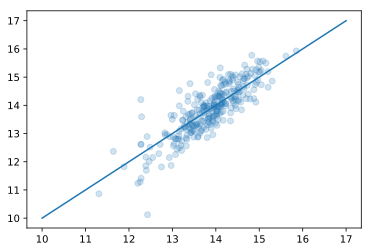

In [15]:
test_set_pred = lasso_model.predict(X_test)
plt.scatter(test_set_pred, y_test, alpha=.2)
plt.plot(np.linspace(10,17,100), np.linspace(10,17,100))

In [16]:
r2_score(y_test, test_set_pred)

0.7081598107564016

In [17]:
lasso_model = Lasso(alpha = .01)
lasso_model.fit(X_train_scaled, y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('height_inches', 0.0),
 ('weight_lbs', -0.0),
 ('birthyear', 0.05372438414916616),
 ('Rounds', 0.17122373723129694),
 ('Fairway Percentage', 0.0),
 ('Avg Distance', 0.013834776991388971),
 ('gir', -0.05616304695569891),
 ('Average Putts', -0.1335486010833027),
 ('Average Scrambling', -0.08964873763944187),
 ('Average SG Putts', 0.24385642972168925),
 ('SG:OTT', 0.42631828290470575),
 ('SG:APR', 0.40475236831247186),
 ('SG:ARG', 0.20673322279425885)]

***

In [18]:
lr_model_ridge = Ridge(alpha = 1)
lr_model_ridge.fit(X_train, y_train)
list(zip(X_train.columns, lr_model_ridge.coef_))

[('height_inches', 0.0010445773782961935),
 ('weight_lbs', 0.0001275920172330503),
 ('birthyear', 0.00798893805009953),
 ('Rounds', 0.013625031775612),
 ('Fairway Percentage', 0.013322172575047345),
 ('Avg Distance', 0.008556134856067883),
 ('gir', -0.04159942710202908),
 ('Average Putts', -0.23953106261641574),
 ('Average Scrambling', -0.037457460844100995),
 ('Average SG Putts', 0.7815965505923561),
 ('SG:OTT', 1.064620640814399),
 ('SG:APR', 1.1498289739779464),
 ('SG:ARG', 1.057029214622085)]

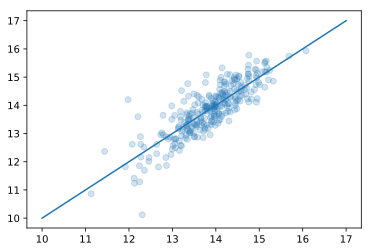

In [19]:
test_set_pred = lr_model_ridge.predict(X_test)
plt.scatter(test_set_pred, y_test, alpha=.2)
plt.plot(np.linspace(10,17,100), np.linspace(10,17,100))

In [20]:
r2_score(y_test, test_set_pred)

0.7124432949307055

In [21]:
lr_model_ridge = Ridge(alpha = 1)
lr_model_ridge.fit(X_train_scaled, y_train)
list(zip(X_train.columns, lr_model_ridge.coef_))

[('height_inches', 0.0014820539317208416),
 ('weight_lbs', 0.003221100030205301),
 ('birthyear', 0.05865787569617318),
 ('Rounds', 0.18479580424012668),
 ('Fairway Percentage', 0.0631580533868971),
 ('Avg Distance', 0.06807778832387584),
 ('gir', -0.12172021036534658),
 ('Average Putts', -0.11365221289786387),
 ('Average Scrambling', -0.13345939694100645),
 ('Average SG Putts', 0.27358536988253057),
 ('SG:OTT', 0.42410820260520127),
 ('SG:APR', 0.4379646382031241),
 ('SG:ARG', 0.2419031783734339)]

***

In [22]:
from sklearn.linear_model import lars_path

In [23]:
alphas, _, coefs = lars_path(X_train_scaled, y_train.values, method='lasso')

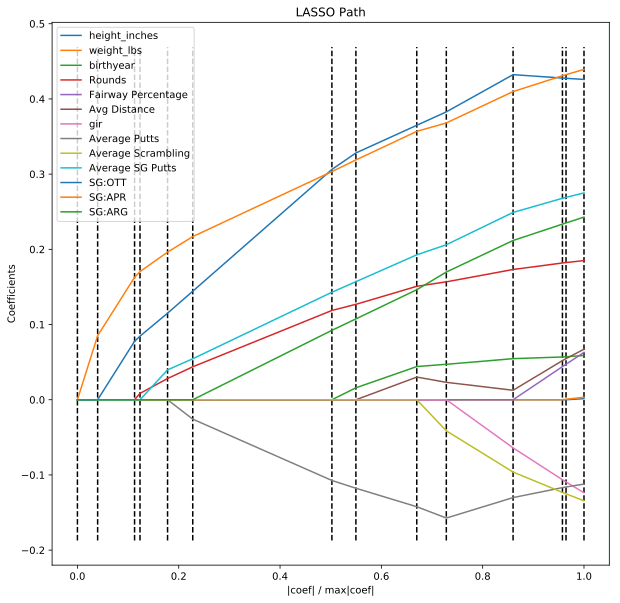

In [24]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

***
Cross Validation test

In [25]:
from sklearn.model_selection import KFold

X, y = g_small.drop(['logmoney','money'], axis=1), g_small['logmoney']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=1) #hold out 20% of the data for final testing

X, y = np.array(X), np.array(y)

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state = 10)
cv_lm_r2s, cv_lm_reg_r2s = [], [] 

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=100)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.7540715370374812, 0.7684486582499858, 0.7356026084009281, 0.7260141535664107, 0.6875478720813113]
Ridge scores:  [0.7502142363781541, 0.7614675896016689, 0.720488947857393, 0.7032271062658912, 0.6827720384470521] 

Simple mean cv r^2: 0.734 +- 0.028
Ridge mean cv r^2: 0.724 +- 0.029


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_scaled,y)
print(f'Simple regression test R^2: {lm.score(X_test_scaled, y_test):.3f}')

Simple regression test R^2: 0.749


/home/rob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=10)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.751


/home/rob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

kf = KFold(n_splits=5, shuffle=True, random_state = 10)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([0.75407154, 0.76844866, 0.73560261, 0.72601415, 0.68754787])

In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state = 10)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.7343369658672234
0.7251502005196382
